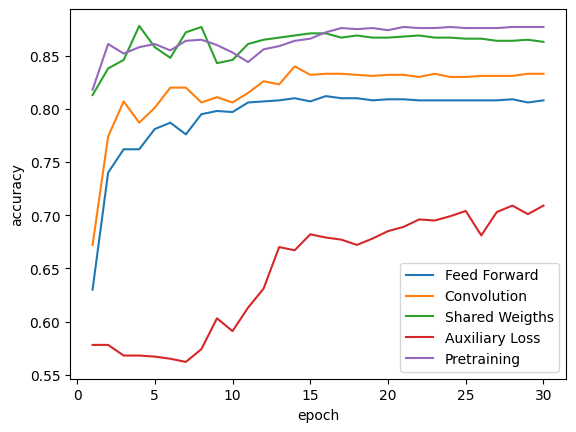

In [22]:
import matplotlib.pyplot as plt

ff = [0.6299999952316284, 0.7400000095367432, 0.7620000243186951, 0.7620000243186951, 0.781000018119812, 0.7870000004768372, 0.7760000228881836, 0.7950000166893005, 0.7979999780654907, 0.796999990940094, 0.8059999942779541, 0.8069999814033508, 0.8080000281333923, 0.8100000023841858, 0.8069999814033508, 0.8119999766349792, 0.8100000023841858, 0.8100000023841858, 0.8080000281333923, 0.8090000152587891, 0.8090000152587891, 0.8080000281333923, 0.8080000281333923, 0.8080000281333923, 0.8080000281333923, 0.8080000281333923, 0.8080000281333923, 0.8090000152587891, 0.8059999942779541, 0.8080000281333923]
cnn = [0.671999990940094, 0.7739999890327454, 0.8069999814033508, 0.7870000004768372, 0.8009999990463257, 0.8199999928474426, 0.8199999928474426, 0.8059999942779541, 0.8109999895095825, 0.8059999942779541, 0.8149999976158142, 0.8259999752044678, 0.8230000138282776, 0.8399999737739563, 0.8320000171661377, 0.8330000042915344, 0.8330000042915344, 0.8320000171661377, 0.8309999704360962, 0.8320000171661377, 0.8320000171661377, 0.8299999833106995, 0.8330000042915344, 0.8299999833106995, 0.8299999833106995, 0.8309999704360962, 0.8309999704360962, 0.8309999704360962, 0.8330000042915344, 0.8330000042915344]
sh = [0.8130000233650208, 0.8379999995231628, 0.8460000157356262, 0.878000020980835, 0.8579999804496765, 0.8479999899864197, 0.871999979019165, 0.8769999742507935, 0.8429999947547913, 0.8460000157356262, 0.8610000014305115, 0.8650000095367432, 0.8669999837875366, 0.8690000176429749, 0.8709999918937683, 0.8709999918937683, 0.8669999837875366, 0.8690000176429749, 0.8669999837875366, 0.8669999837875366, 0.8679999709129333, 0.8690000176429749, 0.8669999837875366, 0.8669999837875366, 0.8659999966621399, 0.8659999966621399, 0.8640000224113464, 0.8640000224113464, 0.8650000095367432, 0.8629999756813049]
aux = [0.578000009059906, 0.578000009059906, 0.5680000185966492, 0.5680000185966492, 0.5669999718666077, 0.5649999976158142, 0.5619999766349792, 0.5740000009536743, 0.6029999852180481, 0.5910000205039978, 0.6129999756813049, 0.6309999823570251, 0.6700000166893005, 0.6669999957084656, 0.6819999814033508, 0.6790000200271606, 0.6769999861717224, 0.671999990940094, 0.6779999732971191, 0.6850000023841858, 0.6890000104904175, 0.6959999799728394, 0.6949999928474426, 0.6990000009536743, 0.7039999961853027, 0.6809999942779541, 0.703000009059906, 0.7089999914169312, 0.7009999752044678, 0.7089999914169312]
pre = [0.8180000185966492, 0.8610000014305115, 0.8519999980926514, 0.8579999804496765, 0.8610000014305115, 0.8550000190734863, 0.8640000224113464, 0.8650000095367432, 0.8600000143051147, 0.8529999852180481, 0.843999981880188, 0.8560000061988831, 0.859000027179718, 0.8640000224113464, 0.8659999966621399, 0.871999979019165, 0.8759999871253967, 0.875, 0.8759999871253967, 0.8740000128746033, 0.8769999742507935, 0.8759999871253967, 0.8759999871253967, 0.8769999742507935, 0.8759999871253967, 0.8759999871253967, 0.8759999871253967, 0.8769999742507935, 0.8769999742507935, 0.8769999742507935]


x = range(1, 31)
y = ff

plt.plot(x, y, label="Feed Forward")
plt.plot(x, cnn, label="Convolution")
plt.plot(x, sh, label="Shared Weigths")
plt.plot(x, aux, label="Auxiliary Loss")
plt.plot(x, pre, label="Pretraining")

plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.legend()

plt.savefig('accs.png')
plt.show()

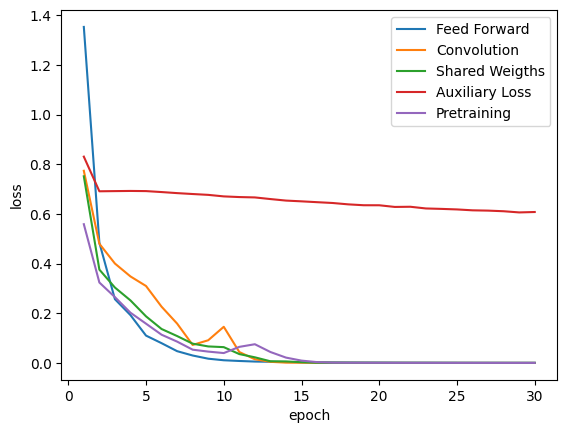

In [24]:
import matplotlib.pyplot as plt

ff = [1.3534226417541504, 0.48433566093444824, 0.25675150752067566, 0.1926586627960205, 0.11016294360160828, 0.07963909208774567, 0.04747015982866287, 0.029974134638905525, 0.017175326123833656, 0.010836835950613022, 0.007968060672283173, 0.0056154378689825535, 0.004703831858932972, 0.003829346736893058, 0.0031922946218401194, 0.00269003352150321, 0.002289604162797332, 0.0019983206875622272, 0.0017561722779646516, 0.0016056154854595661, 0.0013967312406748533, 0.0012573692947626114, 0.0011696110013872385, 0.0010603205300867558, 0.0009329228778369725, 0.0008657186990603805, 0.0007841933402232826, 0.000732286018319428, 0.0006575044826604426, 0.0006249874131754041]
cnn = [0.7740035057067871, 0.4800632894039154, 0.40045365691185, 0.34843167662620544, 0.30992987751960754, 0.22660288214683533, 0.1585511714220047, 0.07254182547330856, 0.09141552448272705, 0.1456558257341385, 0.04408609867095947, 0.014792263507843018, 0.004539361223578453, 0.0013185621937736869, 0.0008727553649805486, 0.0006811752100475132, 0.0005548828048631549, 0.0004568762378767133, 0.0003884764155372977, 0.00033889940823428333, 0.00031653803307563066, 0.0002764765522442758, 0.0002429827000014484, 0.0002165994665119797, 0.0001983117253985256, 0.00018381189147476107, 0.00016844445781316608, 0.00015716358029749244, 0.0001458410988561809, 0.0001373282866552472]
sh = [0.751796543598175, 0.375948429107666, 0.3037072718143463, 0.2518547773361206, 0.18771019577980042, 0.13673135638237, 0.10831480473279953, 0.07768963277339935, 0.06653264164924622, 0.06367465108633041, 0.03576710447669029, 0.022714976221323013, 0.00672396644949913, 0.0060958233661949635, 0.003001550678163767, 0.0008877581567503512, 0.00048598420107737184, 0.00039977108826860785, 0.0003271395689807832, 0.0002818973152898252, 0.00024224075605161488, 0.00022963392257224768, 0.00019835882994811982, 0.0001813883427530527, 0.00016402719484176487, 0.0001491272560087964, 0.0001417483581462875, 0.00013419669994618744, 0.0001226891326950863, 0.00011785353854065761]
aux = [0.8309479355812073, 0.691417932510376, 0.6921341419219971, 0.6927967667579651, 0.6921792030334473, 0.6882975697517395, 0.6840277910232544, 0.6803944110870361, 0.676985502243042, 0.6708440780639648, 0.6681538820266724, 0.6666931509971619, 0.6601027250289917, 0.653981626033783, 0.6509130597114563, 0.6475329399108887, 0.64427250623703, 0.6387977600097656, 0.6352084875106812, 0.6351004242897034, 0.6283798813819885, 0.6290951371192932, 0.6222332119941711, 0.620495617389679, 0.618333637714386, 0.6147392392158508, 0.6135400533676147, 0.6110438704490662, 0.6062854528427124, 0.607947051525116]
pre = [0.5588619112968445, 0.32403141260147095, 0.265130877494812, 0.20231914520263672, 0.15821322798728943, 0.1137370839715004, 0.08593101054430008, 0.05344120040535927, 0.045734018087387085, 0.03984503448009491, 0.06477320194244385, 0.07540128380060196, 0.044110048562288284, 0.021596547216176987, 0.009403386153280735, 0.003361862152814865, 0.00101635477039963, 0.0005993728409521282, 0.0004888782277703285, 0.00042257862514816225, 0.00035071122692897916, 0.0003098059387411922, 0.0002923721622209996, 0.0002593481622170657, 0.0002268973912578076, 0.00020955561194568872, 0.00019380039884708822, 0.00017663580365478992, 0.00016189437883440405, 0.00015578401507809758]

x = range(1, 31)
y = ff



plt.plot(x, y, label="Feed Forward")
plt.plot(x, cnn, label="Convolution")
plt.plot(x, sh, label="Shared Weigths")
plt.plot(x, aux, label="Auxiliary Loss")
plt.plot(x, pre, label="Pretraining")

plt.xlabel('epoch')
plt.ylabel('loss')

plt.legend()

plt.savefig('losss.png')
plt.show()